In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import *
import numpy as np

In [2]:
worksheet = pd.read_csv("Glucose.csv",sep=" ")
worksheet.head()

,0,-10,-9.34000559151173,-9.00800175964832,-8.34299832582474,-8.00999872386456,-7.34399951994419,-7.01099991798401,-6.34700231254101,-6.01299688220024,...,218.587997704744,218.921993076801,219.586996510625,219.919996112585,220.584999546409,220.917999148369,221.583998352289,221.916002184153,222.582001388073,222.915000990033
0,354.898163,0.298247,0.302309,0.302509,0.300623,0.298233,0.304615,0.303335,0.297575,0.305442,...,0.866205,0.852310,0.861435,0.849400,0.880423,0.866084,0.857744,0.871868,0.876135,0.869435
1,355.268555,0.297271,0.299730,0.303309,0.297357,0.296748,0.303485,0.301978,0.298139,0.305012,...,0.858489,0.849133,0.854038,0.848960,0.876055,0.858740,0.851978,0.869753,0.887856,0.852345
2,355.638916,0.294634,0.295024,0.295342,0.295044,0.293781,0.298797,0.298406,0.295902,0.299572,...,0.855001,0.843744,0.853543,0.845538,0.867011,0.845110,0.842277,0.867378,0.871577,0.852323
3,356.009247,0.291486,0.292841,0.290825,0.291649,0.290553,0.294507,0.295423,0.294202,0.296827,...,0.847184,0.843365,0.859525,0.843630,0.866209,0.843996,0.844239,0.856819,0.867586,0.847842
4,356.379547,0.291430,0.293327,0.287490,0.291875,0.289909,0.291317,0.295236,0.294305,0.296566,...,0.841722,0.845831,0.849605,0.844217,0.852105,0.840150,0.836671,0.845310,0.856377,0.838354


In [3]:
worksheet.columns

Index(['0', '-11', '-10.3349965661764', '-10.0019969642162',
       '-9.33700358867645', '-9.00400398671627', '-8.33800478279591',
       '-8.00699672102928', '-7.33800014853477', '-7.00700214505196',
       ...
       '94.1469955593348', '94.4789993911982', '95.1449985951185',
       '95.4770024269819', '96.1430016309023', '96.4760012328625',
       '97.1410046666861', '97.4740042686462', '98.1400034725666',
       '98.4719972461462'],
      dtype='object', length=221)

In [4]:
x2 = worksheet["0"] # 354~750
x1 = list(map(float,worksheet.columns[1:])) # -11~98
x1_inter = [min(x1),max(x1)]
x2_inter = [min(x2),max(x2)]
y = worksheet.iloc[:,1:]

In [5]:
f0 = interp2d(x1,x2,y,kind="cubic")

In [6]:
f0([1,2,3],[300,400,500])

array([[0.33317197, 0.33686609, 0.34169409],
       [0.11592065, 0.1202288 , 0.12459382],
       [0.32390634, 0.31502461, 0.30602543]])

d:\apps\Anaconda3\envs\normal\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'linewidth'
  if sys.path[0] == "":


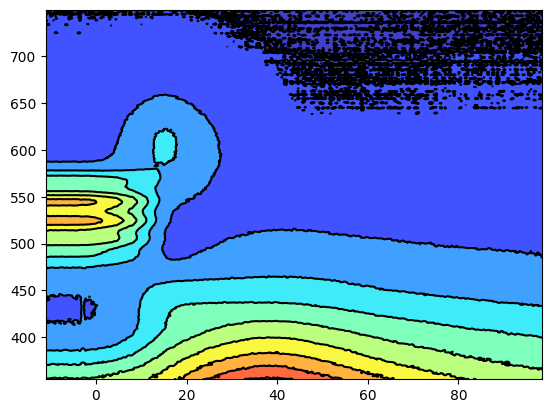

Text(0.5, 0, 'time')

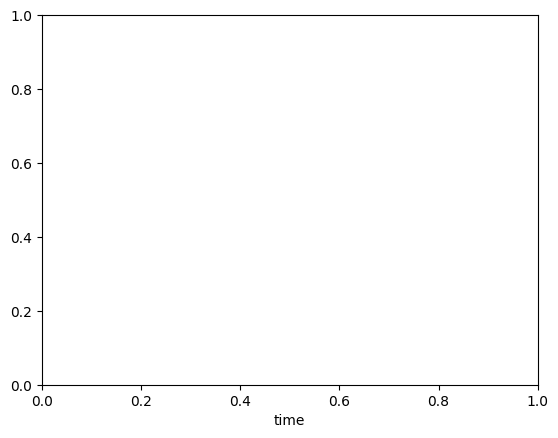

In [11]:
from pylab import *


n = 1000
x1p = np.linspace(x1_inter[0],x1_inter[1],n)
x2p = np.linspace(x2_inter[0],x2_inter[1],n)
#X,Y = np.meshgrid(x1p,x2p)
X = x1p
Y = x2p

contourf(X, Y, f0(X,Y), 8, alpha=.75, cmap='jet')
C = contour(X, Y, f0(X,Y), 8, colors='black', linewidth=.5)
show()